In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join
import matplotlib.pyplot as plt
from nilearn import plotting
import hsluv

sns.set_style('whitegrid')
plt.tight_layout(pad=1.1, h_pad=0.5)

<Figure size 432x288 with 0 Axes>

In [5]:
data_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/data'
fig_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/figures'

In [6]:
df = pd.read_csv(join(data_dir, 'iq+brain+demo.csv'), index_col=0, header=0)
df_ladies = df[df['Sex'] == 'F']
df_ladies = df_ladies.drop('Sex', axis=1)
df_dudes = df[df['Sex'] == 'M']
df_dudes = df_dudes.drop('Sex', axis=1)

In [7]:
subjects = df.index.values

In [8]:
labels = ['Limbic', 'Orbitofrontal', 'Basal Ganglia', 'Salience', 'Hunger', 
          'Motor Learning', 'Frontoparietal', 'Hand', 'Motor Execution', 'Higher Order Visual', 
          'Lateral Visual', 'Medial Visual', 'Default Mode',' Cerebellum', 'Central Executive (right)', 
          'Auditory', 'Mouth', 'Central Executive (left)']

In [9]:
brain_data = df[['fc default mode-left central executive gen',
                             'fc default mode-left central executive phy',
                             'fc default mode-right central executive gen',
                             'fc default mode-right central executive phy',
                             'fc left central executive-right central executive gen',
                             'fc left central executive-right central executive phy',
                             'fc hippo-left central executive gen',
                             'fc hippo-left central executive phy',
                             'fc hippo-right central executive gen',
                             'fc hippo-right central executive phy',
                             'fc hippo-default mode gen', 'fc hippo-default mode phy',
                             'global efficiency gen', 'global efficiency phy', 
                             'le default mode gen', 'le default mode phy', 
                             'le left central executive gen', 'le left central executive phy', 
                             'le right central executive gen', 'le right central executive phy']].values

In [10]:
multicol1 = pd.MultiIndex.from_tuples([('dmn-lcen', 'gen'),
                                       ('dmn-lcen', 'phy'),
                                       ('dmn-rcen', 'gen'),
                                       ('dmn-rcen', 'phy'),
                                       ('rcen-lcen', 'gen'),
                                       ('rcen-lcen', 'phy'),
                                       ('hippo-lcen', 'gen'),
                                       ('hippo-lcen', 'phy'),
                                       ('hippo-rcen', 'gen'),
                                       ('hippo-rcen', 'phy'),
                                       ('hippo-dmn', 'gen'),
                                       ('hippo-dmn', 'phy'),
                                       ('global-eff', 'gen'),
                                       ('global-eff', 'phy'),
                                       ('le-dmn', 'gen'),
                                       ('le-dmn', 'phy'),
                                       ('le-lcen', 'gen'),
                                       ('le-lcen', 'phy'),
                                       ('le-rcen', 'gen'),
                                       ('le-rcen', 'phy')])

brain_df = pd.DataFrame(brain_data, index=df.index, columns=multicol1)

In [11]:
#brain_df.stack().to_csv(join(data_dir, 'brain_df_long.csv'))

In [12]:
brain_df = pd.read_csv(join(data_dir, 'brain_df_long.csv'), header=0, index_col=0)
brain_df.keys()

Index(['Sex', 'condition', 'dmn-lcen', 'dmn-rcen', 'global-eff', 'hippo-dmn',
       'hippo-lcen', 'hippo-rcen', 'le-dmn', 'le-lcen', 'le-rcen',
       'rcen-lcen'],
      dtype='object')

In [13]:
hustle = sns.husl_palette(8)
hustler = sns.husl_palette(8, h=.8)

In [14]:
hustle[2:8]

[[0.5920891529639701, 0.6418467016378244, 0.1935069134991043],
 [0.19783576093349015, 0.6955516966063037, 0.3995301037444499],
 [0.21044753832183283, 0.6773105080456748, 0.6433941168468681],
 [0.22335772267769388, 0.6565792317435265, 0.8171355503265633],
 [0.6423044349219739, 0.5497680051256467, 0.9582651433656727],
 [0.9603888539940703, 0.3814317878772117, 0.8683117650835491]]

In [15]:
corrfonty = {'fontsize': 10,
             'fontweight': 'regular'}
corrfontx = {'fontsize': 10,
             'fontweight': 'regular'}

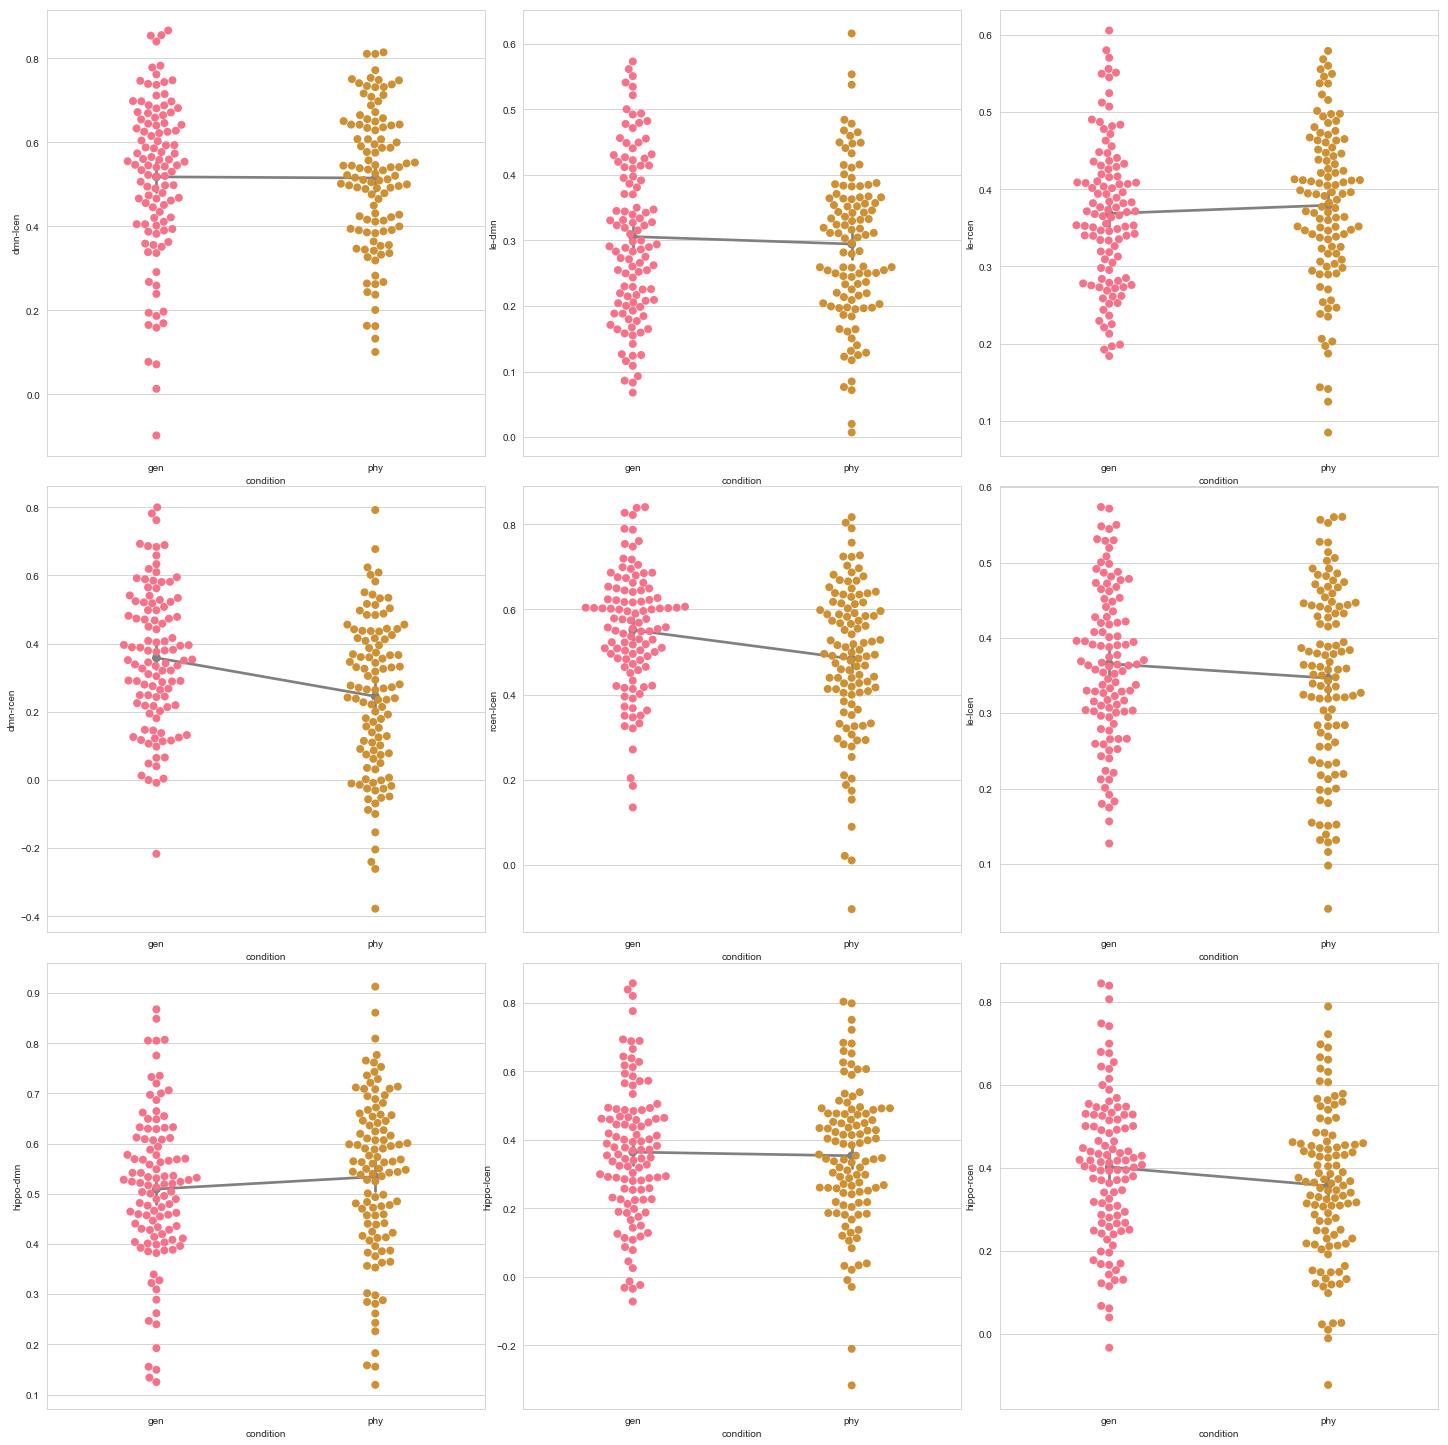

In [15]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), sharex=False, sharey=False, squeeze=False)
mksz = 8
plt.tight_layout()

sns.set_palette(hustle)

q =sns.pointplot(x="condition", y="dmn-lcen", data=brain_df, ax=ax[0][0], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="dmn-rcen", data=brain_df, ax=ax[1][0], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="rcen-lcen", data=brain_df, ax=ax[1][1], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="hippo-dmn", data=brain_df, ax=ax[2][0], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="hippo-rcen", data=brain_df, ax=ax[2][2], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="hippo-lcen", data=brain_df, ax=ax[2][1], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="le-dmn", data=brain_df, ax=ax[0][1], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="le-rcen", data=brain_df, ax=ax[0][2], size=mksz, color='gray')
q =sns.pointplot(x="condition", y="le-lcen", data=brain_df, ax=ax[1][2], size=mksz, color='gray')

q =sns.swarmplot(x="condition", y="dmn-lcen", data=brain_df, ax=ax[0][0], size=mksz)
q =sns.swarmplot(x="condition", y="dmn-rcen", data=brain_df, ax=ax[1][0], size=mksz)
q =sns.swarmplot(x="condition", y="rcen-lcen", data=brain_df, ax=ax[1][1], size=mksz)
q =sns.swarmplot(x="condition", y="hippo-dmn", data=brain_df, ax=ax[2][0], size=mksz)
q =sns.swarmplot(x="condition", y="hippo-rcen", data=brain_df, ax=ax[2][2], size=mksz)
q =sns.swarmplot(x="condition", y="hippo-lcen", data=brain_df, ax=ax[2][1], size=mksz)
q =sns.swarmplot(x="condition", y="le-dmn", data=brain_df, ax=ax[0][1], size=mksz)
q =sns.swarmplot(x="condition", y="le-rcen", data=brain_df, ax=ax[0][2], size=mksz)
q =sns.swarmplot(x="condition", y="le-lcen", data=brain_df, ax=ax[1][2], size=mksz)

fig.savefig(join(fig_dir, '1-brain_networks_condition_swarm.png'), dpi=300)

In [16]:
brain_df.keys()

Index(['Sex', 'condition', 'dmn-lcen', 'dmn-rcen', 'global-eff', 'hippo-dmn',
       'hippo-lcen', 'hippo-rcen', 'le-dmn', 'le-lcen', 'le-rcen',
       'rcen-lcen'],
      dtype='object')

In [16]:
hustler_desat = sns.husl_palette(8, h=.8, s=0.5)

In [17]:
gen_brain_df = brain_df[brain_df['condition'] == 'gen']
phy_brain_df = brain_df[brain_df['condition'] == 'phy']

In [18]:
m_brain_df = brain_df[brain_df['Sex'] == 'M']
f_brain_df = brain_df[brain_df['Sex'] == 'F']

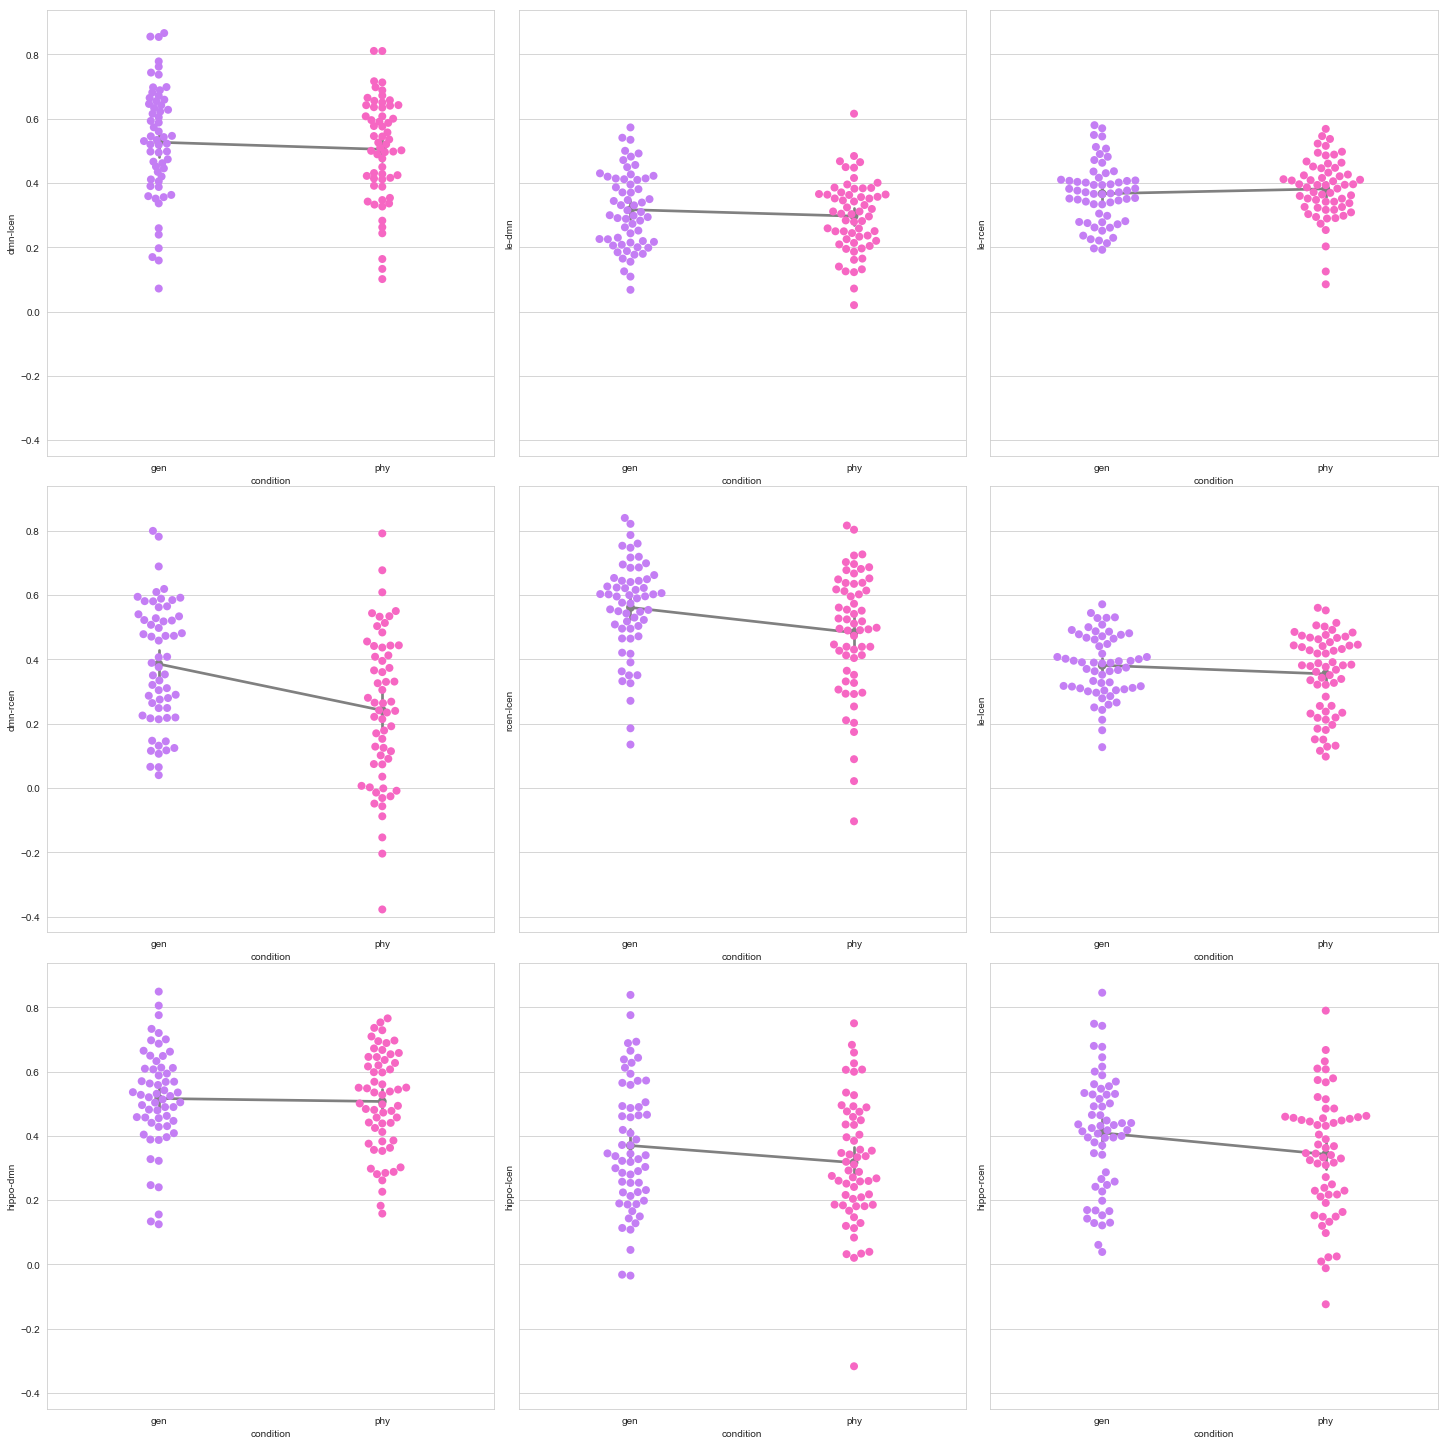

In [26]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), sharex=False, sharey=True, squeeze=False)
plt.tight_layout()
mksz = 8
sns.set_palette(hustler)

q = sns.swarmplot(x="condition", y="dmn-lcen", data=m_brain_df, ax=ax[0][0], size=mksz)
q = sns.swarmplot(x="condition", y="dmn-rcen", data=m_brain_df, ax=ax[1][0], size=mksz)
q = sns.swarmplot(x="condition", y="rcen-lcen", data=m_brain_df, ax=ax[1][1], size=mksz)
q = sns.swarmplot(x="condition", y="hippo-dmn", data=m_brain_df, ax=ax[2][0], size=mksz)
q = sns.swarmplot(x="condition", y="hippo-rcen", data=m_brain_df, ax=ax[2][2], size=mksz)
q = sns.swarmplot(x="condition", y="hippo-lcen", data=m_brain_df, ax=ax[2][1], size=mksz)
q = sns.swarmplot(x="condition", y="le-dmn", data=m_brain_df, ax=ax[0][1], size=mksz)
q = sns.swarmplot(x="condition", y="le-rcen", data=m_brain_df, ax=ax[0][2], size=mksz)
q = sns.swarmplot(x="condition", y="le-lcen", data=m_brain_df, ax=ax[1][2], size=mksz)

sns.set_palette(hustler_desat)
q = sns.pointplot(x="condition", y="dmn-lcen", data=m_brain_df, ax=ax[0][0], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="dmn-rcen", data=m_brain_df, ax=ax[1][0], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="rcen-lcen", data=m_brain_df, ax=ax[1][1], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="hippo-dmn", data=m_brain_df, ax=ax[2][0], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="hippo-rcen", data=m_brain_df, ax=ax[2][2], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="hippo-lcen", data=m_brain_df, ax=ax[2][1], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="le-dmn", data=m_brain_df, ax=ax[0][1], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="le-rcen", data=m_brain_df, ax=ax[0][2], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="le-lcen", data=m_brain_df, ax=ax[1][2], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')



In [27]:
fig.savefig(join(fig_dir, '1-brain_networks_male_swarm-sharey.png'), dpi=300)

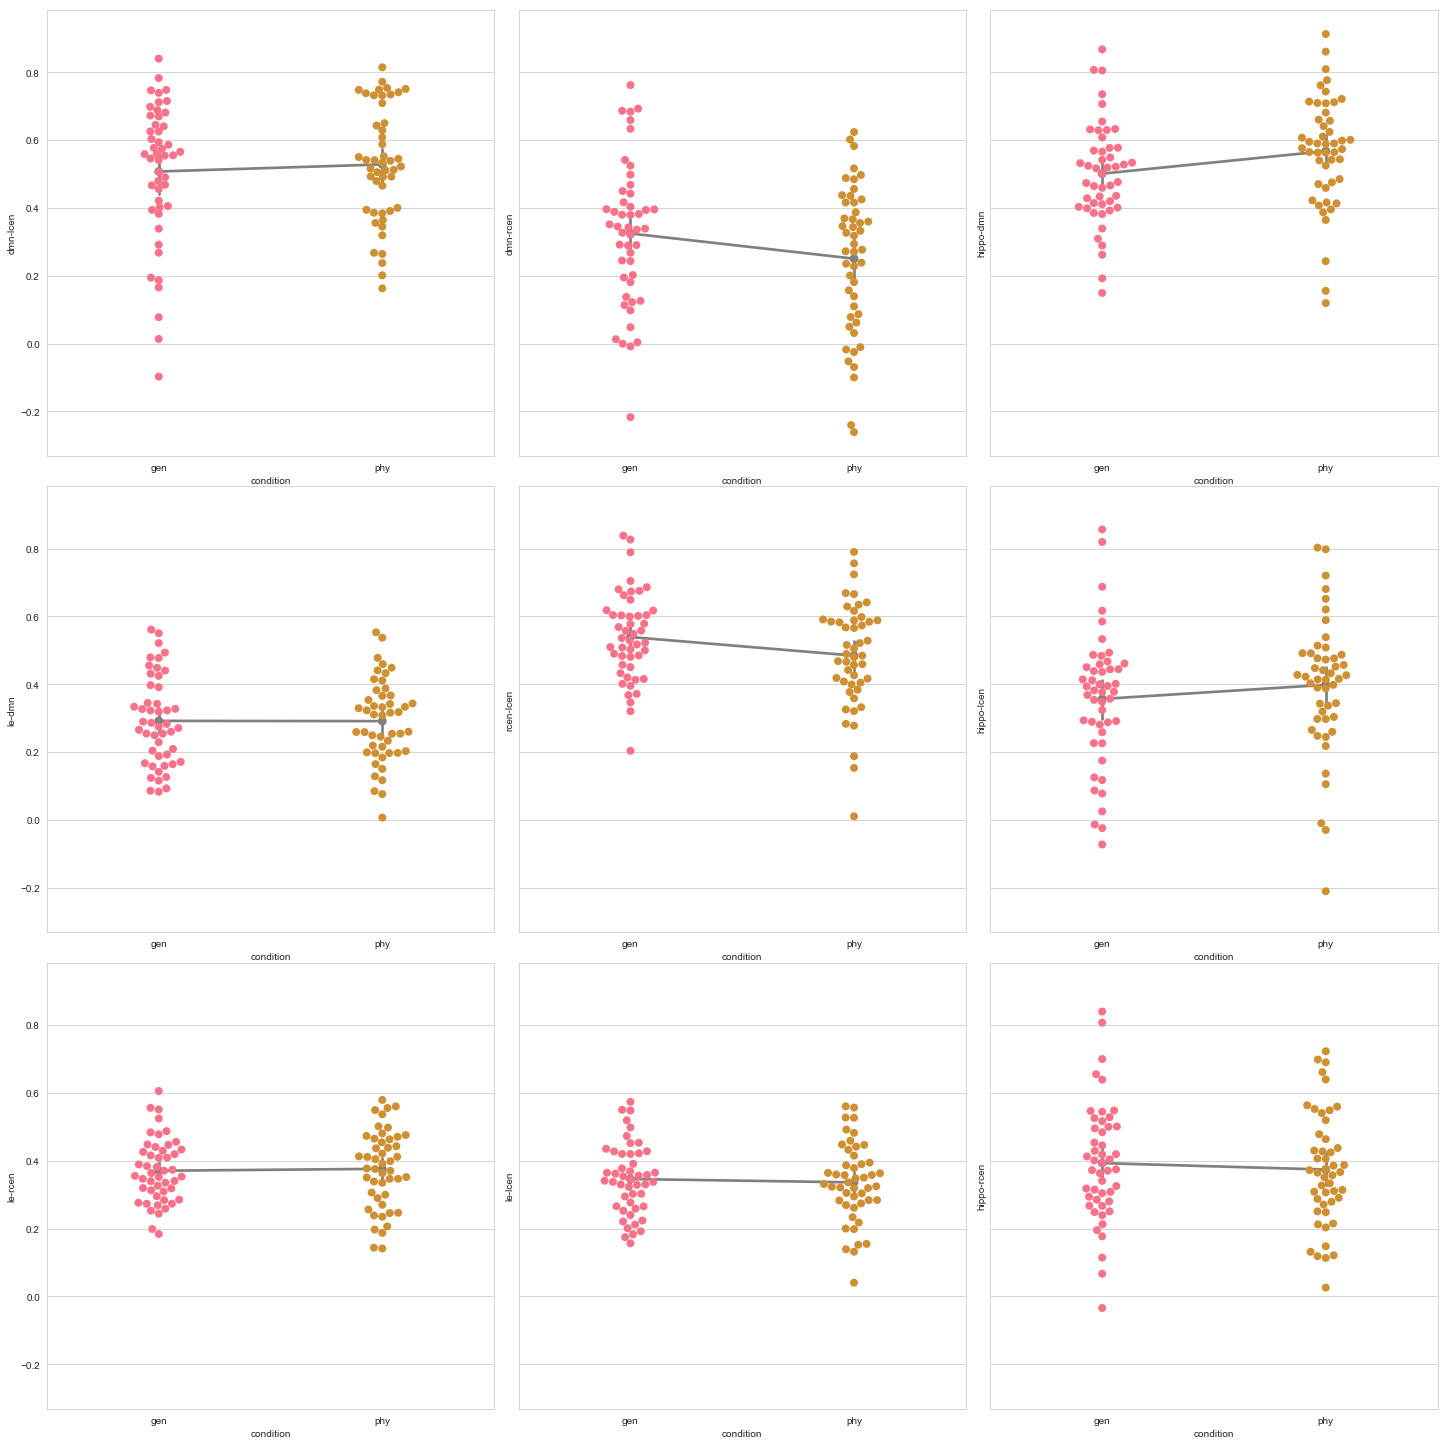

In [28]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), sharex=False, sharey=True, squeeze=False)
plt.tight_layout()
mksz = 8
sns.set_palette(hustle)

q = sns.swarmplot(x="condition", y="dmn-lcen", data=f_brain_df, ax=ax[0][0], size=mksz)
q = sns.swarmplot(x="condition", y="dmn-rcen", data=f_brain_df, ax=ax[0][1], size=mksz)
q = sns.swarmplot(x="condition", y="rcen-lcen", data=f_brain_df, ax=ax[1][1], size=mksz)
q = sns.swarmplot(x="condition", y="hippo-dmn", data=f_brain_df, ax=ax[0][2], size=mksz)
q = sns.swarmplot(x="condition", y="hippo-rcen", data=f_brain_df, ax=ax[2][2], size=mksz)
q = sns.swarmplot(x="condition", y="hippo-lcen", data=f_brain_df, ax=ax[1][2], size=mksz)
q = sns.swarmplot(x="condition", y="le-dmn", data=f_brain_df, ax=ax[1][0], size=mksz)
q = sns.swarmplot(x="condition", y="le-rcen", data=f_brain_df, ax=ax[2][0], size=mksz)
q = sns.swarmplot(x="condition", y="le-lcen", data=f_brain_df, ax=ax[2][1], size=mksz)

sns.set_palette(hustler_desat)
q = sns.pointplot(x="condition", y="dmn-lcen", data=f_brain_df, ax=ax[0][0], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="dmn-rcen", data=f_brain_df, ax=ax[0][1], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="rcen-lcen", data=f_brain_df, ax=ax[1][1], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="hippo-dmn", data=f_brain_df, ax=ax[0][2], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="hippo-rcen", data=f_brain_df, ax=ax[2][2], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="hippo-lcen", data=f_brain_df, ax=ax[1][2], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="le-dmn", data=f_brain_df, ax=ax[1][0], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="le-rcen", data=f_brain_df, ax=ax[2][0], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')
q = sns.pointplot(x="condition", y="le-lcen", data=f_brain_df, ax=ax[2][1], size=mksz, color='gray')
q.legend('', frameon=False, loc='lower center')



In [29]:
fig.savefig(join(fig_dir, '1-brain_networks_female_swarm-sharey.png'), dpi=300)

In [74]:
from nilearn import plotting, datasets, surface
fsaverage = datasets.fetch_surf_fsaverage()

dmn = '/Users/Katie/Dropbox/Katie and Angie/2011 BrainMap ICA Maps/18-network-parcellation/comp13-bin.nii.gz'
lcen = '/Users/Katie/Dropbox/Katie and Angie/2011 BrainMap ICA Maps/18-network-parcellation/comp18-bin.nii.gz'
rcen = '/Users/Katie/Dropbox/Katie and Angie/2011 BrainMap ICA Maps/18-network-parcellation/comp15-bin.nii.gz'
hippo = '/Users/Katie/Dropbox/Projects/physics-retrieval/harvox-hippo-prob50-2mm.nii.gz'

all_regions = '/Users/Katie/Dropbox/Projects/physics-retrieval/18-networks-5.14-mni_2mm_regions.nii.gz'
networks = '/Users/Katie/Dropbox/Projects/physics-retrieval/18-networks-5.14-mni_2mm.nii.gz'

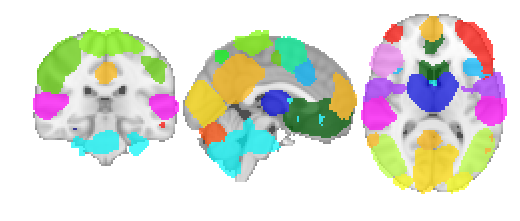

In [102]:
ntwk_brain = plotting.plot_roi(networks, vmin=1, vmax=20, draw_cross=False, annotate=False)
ntwk_brain.savefig(join(fig_dir, '18-ntwks.png'), dpi=300)

In [35]:
color1 = sns.light_palette("#00CC99", as_cmap=True)
color2 = sns.light_palette("#00CCCC", as_cmap=True)
color3 = sns.light_palette("#02A4D3", as_cmap=True)
color4 = sns.light_palette("#4F69C6", as_cmap=True)

In [36]:
color2 = sns.light_palette((0.19783576093349015, 0.6955516966063037, 0.3995301037444499), as_cmap=True)
color3 = sns.light_palette((0.21044753832183283, 0.6773105080456748, 0.6433941168468681), as_cmap=True)
color4 = sns.light_palette((0.22335772267769388, 0.6565792317435265, 0.8171355503265633), as_cmap=True)
color1 = sns.light_palette([0.5920891529639701, 0.6418467016378244, 0.1935069134991043], as_cmap=True)

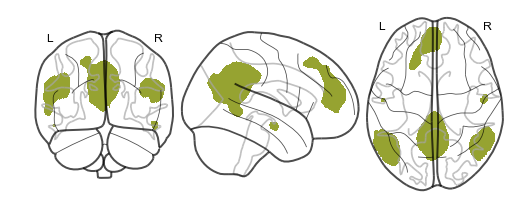

In [37]:
dmn_brain = plotting.plot_glass_brain(dmn, threshold=0.9, cmap=color1)
dmn_brain.savefig(join(fig_dir, '1-dmn.png'), dpi=300)

In [ ]:
lcen_brain = plotting.plot_glass_brain(lcen, threshold=0.9, cmap=color2)
lcen_brain.savefig(join(fig_dir, '1-lcen.png'), dpi=300)

In [ ]:
rcen_brain = plotting.plot_glass_brain(rcen, threshold=0.9, cmap=color3)
rcen_brain.savefig(join(fig_dir, '1-rcen.png'), dpi=300)

In [ ]:
hippo_brain = plotting.plot_glass_brain(hippo, threshold=0.9, cmap=color4)
hippo_brain.savefig(join(fig_dir, '1-hippo.png'), dpi=300)

# Connectivity x grade scatter plots

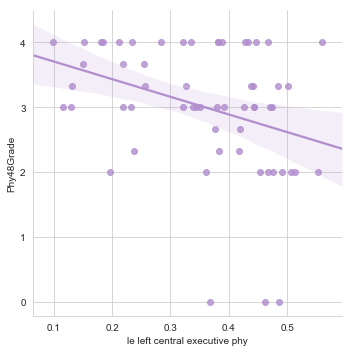

In [56]:
g = sns.lmplot('le left central executive phy', 'Phy48Grade', data=df_dudes, fit_reg=True)

In [58]:
g.savefig(join(fig_dir,'male_le-lcen_grade.png'), dpi=300)

# Sex differences in IQ

In [68]:
iq_cmap = [hustle[0], hustler[0]]

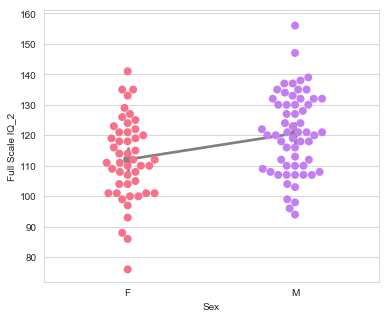

In [72]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
g = sns.swarmplot(x="Sex", y="Full Scale IQ_2", data=df, size=mksz, palette=iq_cmap)
g = sns.pointplot(x="Sex", y="Full Scale IQ_2", data=df, size=mksz, color='gray')

In [73]:
fig.savefig(join(fig_dir, 'sex-differences-iq.png'), dpi=300)

# Gender x behavior scatter

In [104]:
df_dudes.rename({('2', 'GID Post'): 'GIDPost'}, axis=1, inplace=True)

In [108]:
df_dudes.keys()

Index(['AgeOnScanDate', 'Phy48Grade', 'GPA.PreSem',
       'fc default mode-left central executive gen',
       'fc default mode-left central executive phy',
       'fc default mode-right central executive gen',
       'fc default mode-right central executive phy',
       'fc hippo-default mode gen', 'fc hippo-default mode phy',
       'fc hippo-left central executive gen',
       'fc hippo-left central executive phy',
       'fc hippo-right central executive gen',
       'fc hippo-right central executive phy',
       'fc left central executive-right central executive gen',
       'fc left central executive-right central executive phy',
       'global efficiency gen', 'global efficiency phy', 'le default mode gen',
       'le default mode phy', 'le left central executive gen',
       'le left central executive phy', 'le right central executive gen',
       'le right central executive phy', 'Verbal Comprehension Sum_2',
       'Perceptual Reasoning Sum_2', 'Full Scale IQ_2'],
      dtyp

In [106]:
g = sns.lmplot('Full Scale IQ_2', 'GIDPost', data=df_dudes, fit_reg=True)

KeyError: "['GIDPost'] not in index"

In [ ]:
pal = sns.color_palette("husl", 18)
pal_cmap = sns.blend_palette(pal, as_cmap=True, n_colors=18)

In [ ]:
pal2 = sns.husl_palette(n_colors=18, h=0.01, s=0.9, l=0.5)
pal_cmap = sns.blend_palette(pal2, as_cmap=True, n_colors=19)

In [ ]:
sns.palplot(pal2)

In [ ]:
#all_ntwks = plotting.plot_glass_brain(networks, cmap=pal_cmap)
#all_ntwks.add_contours(networks, colors=pal, filled=True)
fsaverage = datasets.fetch_surf_fsaverage()
tr = surface.vol_to_surf(networks, fsaverage.pial_right, interpolation='nearest')
plotting.plot_surf_roi(fsaverage.pial_right, tr,bg_map=fsaverage.sulc_right, cmap=pal_cmap, hemi='right')

# NBS Results for comparing whole-brain graphs

In [27]:
#fixed left and right CENs here
ntwk_labels = ['Limbic', 'Orbitofrontal', 'Basal Ganglia', 'Salience', 'Hunger', 
          'Motor Learning', 'Frontoparietal', 'Hand', 'Motor Execution', 'Higher Order Visual', 
          'Lateral Visual', 'Medial Visual', 'Default Mode',' Cerebellum', 'Central Executive (right)', 
          'Auditory', 'Mouth', 'Central Executive (left)']

regn_labels = ['limbic', 'limbic', 'orbitofrontal', 'orbitofrontal', 'basal ganglia',
          'salience', 'salience', 'salience', 'hunger', 'hunger', 'hunger',
          'hunger', 'hunger', 'hunger', 'hunger', 'motor learning', 'frontoparietal',
          'frontoparietal', 'frontoparietal', 'hand', 'hand', 'hand', 'motor execution',
          'motor execution', 'higher order visual', 'higher order visual',
          'lateral visual', 'lateral visual', 'medial visual', 'default mode',
          'default mode', 'default mode', 'default mode', 'default mode', ' cerebellum',
          'right central executive', 'right central executive', 'right central executive',
          'right central executive', 'right central executive', 'auditory', 'auditory',
          'mouth', 'mouth', 'left central executive', 'left central executive',
          'left central executive']

In [28]:
hustle[0]

[0.9677975592919913, 0.44127456009157356, 0.5358103155058701]

In [29]:
corrmats = {'phy': np.zeros((18,18)),
            'gen': np.zeros((18,18))}
conditions = ['gen', 'phy']

#Get average correlation maps per condition
for subject in subjects:
    for condition in conditions:
        subj_corrmat = np.genfromtxt('{0}/out/{1}-{2}-corrmat.csv'.format(data_dir, subject, condition), delimiter=' ')
        corrmats[condition] = corrmats[condition] + subj_corrmat

corrmats_r = {'phy': np.zeros((47,47)),
              'gen': np.zeros((47,47))}

#Get average correlation maps per condition
for subject in subjects:
    if subject != 321:
        if subject != 618:
            for condition in conditions:
                corrmat = pd.read_csv('{0}/out/{1}-{2}-corrmat-regionwise.csv'.format(data_dir, subject, condition), 
                                      header=0, index_col=0)
                subj_corrmat = corrmat.values
                corrmats_r[condition] = corrmats_r[condition] + subj_corrmat

In [30]:
gen_gt_phy_ntwk = pd.read_csv(join(data_dir, 'gen-gt-phy_gen_comp_adj_[0.008].csv'), header=0, index_col=0)
gen_gt_phy_regn = pd.read_csv(join(data_dir, 'gen-gt-phy_gen-regionwise_comp_adj_[0.006].csv'), header=0, index_col=0)

In [31]:
diff_r = (corrmats_r['gen'] - corrmats_r['phy']) / 105
diff = (corrmats['gen'] - corrmats['phy']) / 107

In [32]:
#hustler = sns.diverging_palette(177 , 0, s = 70, l = 50, n = 60)

gen_phy = sns.blend_palette([hustle[1],[1,1,1],hustle[0]], n_colors=60)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


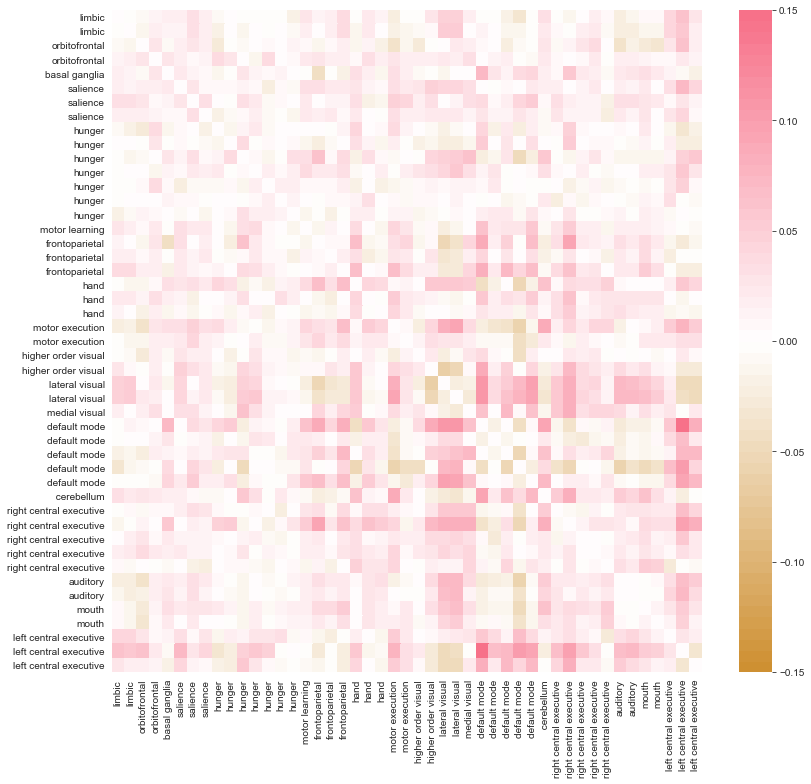

In [33]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 11))
#g = sns.clustermap(diff, xticklabels=ntwk_labels, yticklabels=ntwk_labels, 
#                   vmin=-0.15, vmax=0.15, cmap=hustler)
g = sns.heatmap(diff_r, xticklabels=regn_labels, yticklabels=regn_labels, 
                   vmin=-0.15, vmax=0.15, cmap=gen_phy)
fig.savefig(join(fig_dir, '2-brain_regions_exploratory-noannot.png'), dpi=300)

# Make a figure that's a heatmap with connectivity values representing the difference between conditions with * in subgraph connections (whole sample, gen > phy

## Then make a similar graph for regionwise results
## And one for each M > F gen & phy, M: gen > phy

In [34]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=networks)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


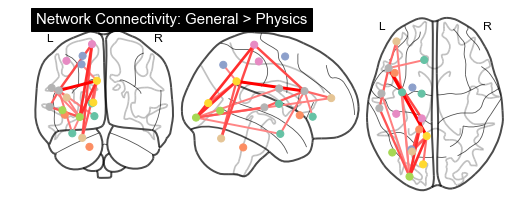

In [35]:
plotting.plot_connectome(diff, coordinates,
                         edge_threshold="90%",
                         title='Network Connectivity: General > Physics')

In [36]:
rgn_color =[pal[0], pal[0], pal[1], pal[1], pal[2],
          pal[3], pal[3], pal[3], pal[4], pal[4], pal[4],
          pal[4], pal[4], pal[4], pal[4], pal[5], pal[6],
          pal[6], pal[6], pal[7], pal[7], pal[7], pal[8],
          pal[8], pal[9], pal[9],
          pal[10], pal[10], pal[11], pal[12],
          pal[12], pal[12], pal[12], pal[12], pal[13],
          pal[14], pal[14], pal[14],
          pal[14], pal[14], pal[15], pal[15],
          pal[16], pal[16], pal[17], pal[17],
          pal[17]]

NameError: name 'pal' is not defined

In [37]:
coordinates_r = plotting.find_parcellation_cut_coords(labels_img=all_regions)

In [38]:
plotting.plot_connectome(diff_r, coordinates_r,
                         edge_threshold="99%",
                         title='Regionwise Connectivity: General > Physics', 
                         node_color=rgn_color)

NameError: name 'rgn_color' is not defined

## Within-sex, between-condition comparisons

In [39]:
m_white = sns.blend_palette([[1,1,1], [0.9632313909518838, 0.40561159727794466, 0.7633379508418209]],
                                     n_colors=2)

In [40]:
#and now for men, bc there were no differences for ladies
m_gen_gt_phy = pd.read_csv(join(data_dir, 'm_gen-gt-phy_comp_adj_[0.045].csv'), header=0, index_col=0)
m_gen_gt_phy_r = pd.read_csv(join(data_dir, 'm_gen-gt-phy-regionwise_comp_adj_[0.042].csv'), header=0, index_col=0)

In [41]:
#compute average gen connectivity for dudes and for ladies, then subtract. use same procedure as above

In [42]:
m_corrmat = {'phy': np.zeros((18,18)),
             'gen': np.zeros((18,18))}
f_corrmat = {'phy': np.zeros((18,18)),
             'gen': np.zeros((18,18))}

for dude in df_dudes.index.values:
    for condition in conditions:
        subj_corrmat = np.genfromtxt('{0}/out/{1}-{2}-corrmat.csv'.format(data_dir, dude, condition), delimiter=' ')
        m_corrmat[condition] = m_corrmat[condition] + subj_corrmat

for lady in df_ladies.index.values:
    for condition in conditions:
        subj_corrmat = np.genfromtxt('{0}/out/{1}-{2}-corrmat.csv'.format(data_dir, lady, condition), delimiter=' ')
        f_corrmat[condition] = f_corrmat[condition] + subj_corrmat

## Between-sex, within-condition comparisons

In [43]:
m_gt_f_gen = pd.read_csv(join(data_dir, 'm-gt-f_gen_comp_adj_[0.023].csv'), header=0, index_col=0)
m_gt_f_gen_r = pd.read_csv(join(data_dir, 'm_gen-gt-phy-regionwise_comp_adj_[0.042].csv'), header=0, index_col=0)
m_gen_gt_phy = pd.read_csv(join(data_dir, 'm_gen-gt-phy_comp_adj_[0.045].csv'), header=0, index_col=0)

In [44]:
m_phy = m_corrmat['phy'] / len(df_dudes.index)
m_gen = m_corrmat['gen'] / len(df_dudes.index)
f_phy = f_corrmat['phy'] / len(df_ladies.index)
f_gen = f_corrmat['gen'] / len(df_ladies.index)

In [45]:
m_gt_f_gen_corr = m_gen - f_gen

In [46]:
m_gen_gt_phy_corr = m_gen - m_phy

# And now make heatmap plots

In [47]:
corrfonty = {'fontsize': 18,
             'fontweight': 'regular'}
corrfontx = {'fontsize': 18,
             'fontweight': 'regular',
             'rotation': 'vertical'}
titlefont = {'fontsize': 24,
             'fontweight': 'regular'}

In [48]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

[Text(0,0.5,'Limbic'),
 Text(0,1.5,'Orbitofrontal'),
 Text(0,2.5,'Basal Ganglia'),
 Text(0,3.5,'Salience'),
 Text(0,4.5,'Hunger'),
 Text(0,5.5,'Motor Learning'),
 Text(0,6.5,'Frontoparietal'),
 Text(0,7.5,'Hand'),
 Text(0,8.5,'Motor Execution'),
 Text(0,9.5,'Higher Order Visual'),
 Text(0,10.5,'Lateral Visual'),
 Text(0,11.5,'Medial Visual'),
 Text(0,12.5,'Default Mode'),
 Text(0,13.5,' Cerebellum'),
 Text(0,14.5,'Central Executive (right)'),
 Text(0,15.5,'Auditory'),
 Text(0,16.5,'Mouth'),
 Text(0,17.5,'Central Executive (left)')]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


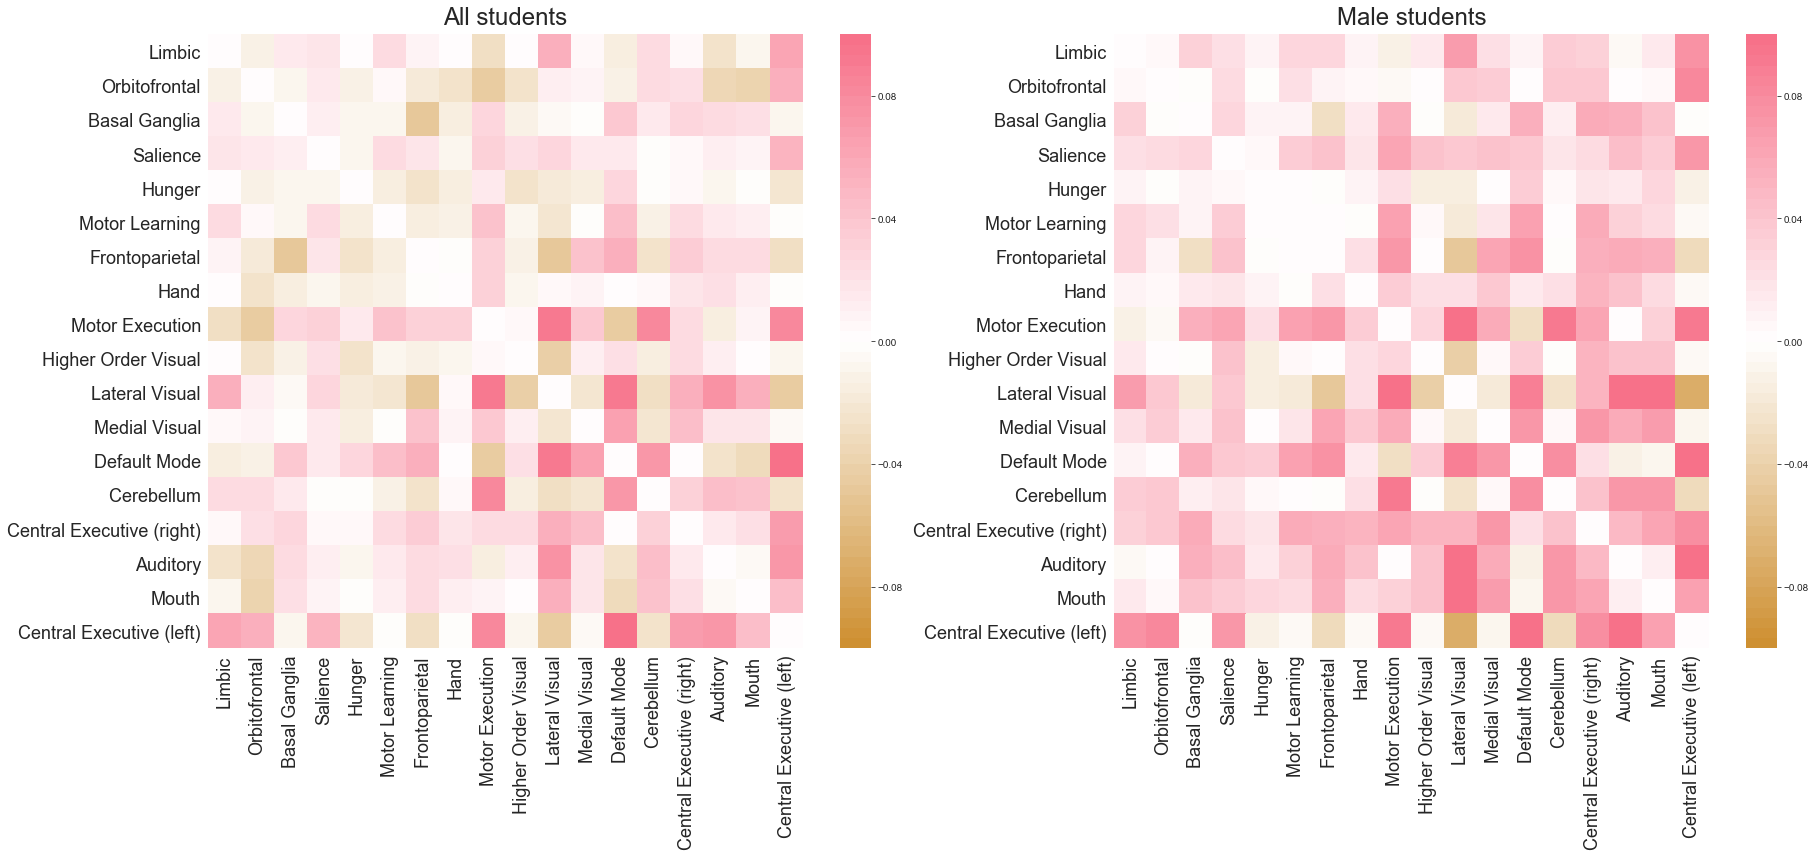

In [49]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 12))

g = sns.heatmap(diff, yticklabels=ntwk_labels, ax=axes[0], 
                vmin=-0.1, vmax=0.1, cmap=gen_phy, cbar=True)
g.set_title('All students', fontdict=titlefont, pad=10)
g.set_xticklabels(fontdict=corrfontx, labels=ntwk_labels)
g.set_yticklabels(fontdict=corrfonty, labels=ntwk_labels)
g = sns.heatmap(m_gen_gt_phy_corr, yticklabels=ntwk_labels, vmin=-0.1, vmax=0.1,
                cmap=gen_phy, cbar=True, ax=axes[1])
g.set_title('Male students', fontdict=titlefont, pad=10)
g.set_xticklabels(fontdict=corrfontx, labels=ntwk_labels)
g.set_yticklabels(fontdict=corrfonty, labels=ntwk_labels)

In [50]:
fig.savefig(join(fig_dir, '2-brain_networks_exploratory-noannot.png'), dpi=300)